# QKD Text
Name

Date

## Pre-Lab

#### Worked Problem #1 - entangled photon generation
For example:

If I put in vertical pump light, for type 0 SPDC I expect signal and idler to be vertical. For Type 1, I expect signal and idler to be horizontal, and for type 2, I expect signal to be horizontal and idler to be vertical. See, e.g. [HC Photonics page on PPLN](https://www.hcphotonics.com/ppln-guide-overview)

For example: 

If I tell you the pump has $\lambda_p$ and the signal is $\lambda_s$, can you tell me $\lambda_i$ of the idler? 
$$
E = \hbarω
$$
$$
E_p = E_s + E_i
$$
$$
ω_p = ω_s + ω_i 
$$
$$
ω_i = ω_p - ω_s
$$
$$
ω = 2πc/λ
$$
$$
1/λ_i = 1/λ_p - 1/λ_s
$$

#### Worked Problem #2 - One time pad encryption
In order to use OTP, you need a key that's the same length as the message. Additionally, you need a new key for every message you want to encrypt and send: the protocol is only secure when each pad is used only once.

Encrypting and decrypting a message is simple: bitwise XOR with the key. If you XOR the raw message with the key, you get the ciphertext. Then if you XOR the cypher test with the key, you get the initial message back.

In [1]:
import numpy as np
import random

LENGTH = 10;
# Generate a random message
mess = np.random.randint(low = 0, high = 2, size = (LENGTH,))

# Generate a random key
key = np.random.randint(low = 0, high = 2, size = (LENGTH,))

# Generate the cypher text by performing bitwise XOR on the key and the message
cypher = mess^key

# Recover the original message by performing bitwise XOR on the cypher
# and the key
recover = cypher^key

print("Message: % s" %(mess))
print("Key    : % s" %(key))
print("Now XOR those to get the cyphertext:")
print("Cypher : % s" %(cypher))
print("To recover the original message, you XOR the key and the cypher")
print("Key    : % s" %(key))
print("Cypher : % s" %(cypher))
print("The recovered message after decryption is")
print("Decrypt: % s" %(recover))
print("Compare with original message")
print("Message: % s" %(mess))

Message: [1 1 0 1 1 0 0 0 1 0]
Key    : [0 0 0 1 1 0 0 0 0 0]
Now XOR those to get the cyphertext:
Cypher : [1 1 0 0 0 0 0 0 1 0]
To recover the original message, you XOR the key and the cypher
Key    : [0 0 0 1 1 0 0 0 0 0]
Cypher : [1 1 0 0 0 0 0 0 1 0]
The recovered message after decryption is
Decrypt: [1 1 0 1 1 0 0 0 1 0]
Compare with original message
Message: [1 1 0 1 1 0 0 0 1 0]


#### Worked Problem #3 - Alice and Bob estimate the error
My code isn't necessarily the most pedagogically useful - do we want to make this easier for students to parse? [QKD simulator](https://qkdsimulator.com/)

The next cell contains the function we'll use to "run" the QKD experiment. 

In [2]:
def QKDRun(NN,TT,FE,PRINT):
# NN is the number of photons Alice sends to Bob
# TT is the transmissivity of the channel from Alice to Bob from 0 to 1
# FE is Eve's involvement on a scale from 0 to 1. 1 indicates she detects and resends every photon. 0 indicates she never detects and resends.    
    if PRINT == 1:
        print("Look at each bit")
 #       print("Tx bit value | Tx basis | Measure & Resent? | Eve's pol | Eve's bit | Does Bob receive bit? | Rx bas | Rx bit | Bob's msmt basis | Bob's msmt bit")
# The above print statement is to help with debugging

    # What bits did Alice's transmitted message send?
    bits_tx = np.zeros((NN)) - 1
    # What polarization did Alice use?
    pol_tx = np.zeros((NN)) - 1

    # Did the photon make it?
    photon_rx = np.zeros((NN)) - 1
    # Bob's measurement basis
    pol_rx = np.zeros((NN)) - 1
    # Bob's received photons
    bits_rx = np.zeros((NN)) - 1

    # Did Eve interefere?
    Eve_rx = np.zeros((NN)) - 1
    Eve_pol = np.zeros((NN)) - 1
    Eve_bit = np.zeros((NN)) - 1



    for i in range (NN):
        # Alice generates a random bit to send
        bit_A = random.randint(0,1)
        bits_tx[i] = bit_A
        # Now she selects a basis
        bas_A = random.randint(0,1)
        pol_tx[i] = bas_A

       # Now decide if Eve does something
        if random.random() <= FE: # if Eve -DOES- decide to eavesdrop & send
            Eve_rx[i] = 1 # Record that this is an occurence of Eve eavesdropping
            Eve_bas = random.randint(0,1) # She randomly selects a basis
            Eve_pol[i] = Eve_bas
            if Eve_bas == bas_A: # If her basis matches Alice's
                Eve_bit[i] = bit_A # Then she recovers the bit perfectly
            else:
                Eve_bit[i] = random.randint(0,1) # otherwise, it's a coin toss   
            bit_rx = Eve_bit[i] # Now the bit Bob receives will be the bit Eve sends
            bas_rx = Eve_bas # In the basis that Eve sends
        else: # If Eve isn't measuring and sending out photons
            Eve_bas = -1
            pho_E = 0 # Mark this as no Eve involvement
            bit_rx = bit_A # The bit Bob receives is ths bit Alice sends
            bas_rx = bas_A # in the basis in which Alice sent it

        # If the photon makes it through the loss channel
        if random.random() <= TT:
            photon_rx[i] = 1
            bas_B = random.randint(0,1) # Bob randomly selects a basis
            pol_rx[i] = bas_B
            if bas_B == bas_rx:
                bit_B = bit_rx
            else:
                bit_B = random.randint(0,1)
            bits_rx[i] = bit_B
        else:
            photon_rx[i] = 0;
            bas_B = -1;
#       print("Tx bit value | Tx basis | Measure & Resent? | Eve's pol | Eve's bit | Does Bob receive bit? | Rx bas | Rx bit | Bob's msmt basis | Bob's msmt bit")
        if PRINT == 1:
           # print("%d | %d | %d | %d | %d | %d | %d | %d | %d | %d" %(bit_A,bas_A,Eve_rx[i],Eve_bas,Eve_bit[i],photon_rx[i],bas_rx,bit_rx,pol_rx[i],bits_rx[i]))
           # The above print statement is to help with debugging. It wil show you the value of the array, which is good for debugging but not particularly easy for a human to parse
            print("\nFor bit %d" %(i))
            print("Alice sent bit value %d with basis %s" %(bit_A,basisdef(bas_A)))
            if photon_rx[i]==1:
                if Eve_rx[i]==1:
                    print("Eve measured with %s and saw bit value %d and sent Bob a bit with those values" %(basisdef(Eve_bas),Eve_bit[i]))
                    print("Bob received the bit value %d in basis %s" %(Eve_bit[i], basisdef(Eve_bas)))
                else:
                    print("Eve did not do a measurement.")
                    print("Bob received the bit value %d in basis %s" %(bit_rx,basisdef(bas_rx)))
                print("Bob used basis %s and measured bit value %d"%(basisdef(pol_rx[i]),bits_rx[i]))
            else:
                if Eve_rx[i]==1:
                    print("Eve measured with %s and saw bit value %d" %(basisdef(Eve_bas),Eve_bit[i]))
                    print("She sent that to Bob, but Bob didn't receive a photon")
                else:
                    print("Eve did no measurement, and Bob didn't receive a photon")
    # now do some processing
    
    


    # First limit ourselves to cases where Alice and Bob used the same bases
    ix = np.array([np.where(pol_tx == pol_rx)])
    bits_tx_sifted = np.array(bits_tx[ix])
    bits_tx_sifted = bits_tx_sifted[0,0]
    bits_rx_sifted = np.array(bits_rx[ix])
    bits_rx_sifted = bits_rx_sifted[0,0]

    # Now look bit error rate (BER)
    errors = (bits_tx_sifted != bits_rx_sifted).astype(int)
    errors_total = errors.sum()
    usable_key = ix.size - errors_total
    if ix.size >0:
      BER = 1.0/ix.size * errors.sum()
    else:
      BER = 0.5

    # What did Eve get?
    ixe = np.array([np.where((Eve_rx ==1) & (Eve_pol == pol_tx))])

    if PRINT == 1:
      print("\nAlice sent Bob % d bits"% NN)
      print("Bob received % d bits"% photon_rx.sum())
      print("They used the same basis in %d of those bits" %ix.size)
      print("This resulted in a total of %d bits without errors" %usable_key)
      print("The BER was %10.2E" %BER)
      print("Eve got %d bits" %ixe.size)        
    return photon_rx.sum(),ix.size,usable_key,BER,ixe.size


def basisdef(basis):
    if basis:
        return "HV"
    else:
        return "AD"

First let's run the code with short number of bits and print out the detailed results for each bit. This will help you to see how different factors affect the bit Bob ultimately measures. 

In [3]:
NN = 10
FE = 0.25
TT = 0.95


bits_rx, basis_match, keylength, BER, Eve = QKDRun(NN,TT,FE,1)

Look at each bit

For bit 0
Alice sent bit value 1 with basis AD
Eve did not do a measurement.
Bob received the bit value 1 in basis AD
Bob used basis HV and measured bit value 1

For bit 1
Alice sent bit value 1 with basis HV
Eve measured with AD and saw bit value 0 and sent Bob a bit with those values
Bob received the bit value 0 in basis AD
Bob used basis HV and measured bit value 1

For bit 2
Alice sent bit value 1 with basis HV
Eve did not do a measurement.
Bob received the bit value 1 in basis HV
Bob used basis HV and measured bit value 1

For bit 3
Alice sent bit value 0 with basis HV
Eve measured with HV and saw bit value 0 and sent Bob a bit with those values
Bob received the bit value 0 in basis HV
Bob used basis HV and measured bit value 0

For bit 4
Alice sent bit value 1 with basis HV
Eve did not do a measurement.
Bob received the bit value 1 in basis HV
Bob used basis HV and measured bit value 1

For bit 5
Alice sent bit value 1 with basis AD
Eve did not do a measurement.

Now let's run the QKD experiment keeping everything constant EXCEPT for the tranismissivity of the channel. We'll change the transmissivity of the channel each time we run the experiment, and then we can see how that affects the key length.

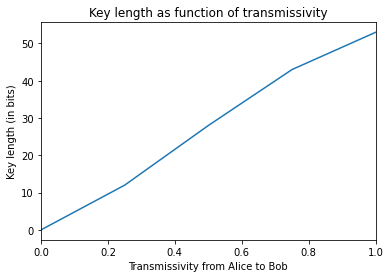

In [4]:
# Change the transmissivity between Alice and Bob to see how that affects the key length 
import matplotlib.pyplot as plt

# How many photons does Alice send Bob?
NN = 100
# Transmissivity of the channel between Alice and Bob?
# Set a range with a maximum of 1
TT = np.linspace(0.0,1,5)
# Set Eve's involvement. Range is [0 1]
FE = 0
# Initialize array
kl = np.zeros((TT.size))


# Run the QKD experiment for each value of transmissivity
for y in range(TT.size):
    tx = TT[y]
    bits_rx, basis_match, keylength, BER, Eve = QKDRun(NN,tx,FE,0)
    kl[y] = keylength

# Now plot the key length as a function of transmissivity
fig, ax = plt.subplots()
ax.plot(TT, kl)
ax.set_xlabel('Transmissivity from Alice to Bob')
ax.set_xlim(0,1)
ax.set_ylabel('Key length (in bits)')
ax.set_title("Key length as function of transmissivity")
plt.show()    

Now let's do the same thing but with Eve's involvement. We'll look at how the frequency of her attacks affects the length of the key.

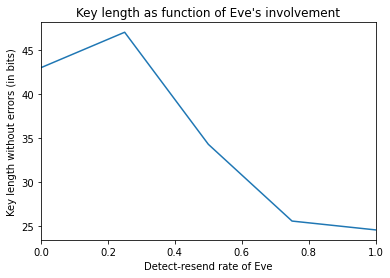

In [5]:
# Now change Eve's involvement

NN = 100
FE_all = np.linspace(0.0,1.0,5)
TT = 0.95
kl = np.zeros((FE_all.size))



for y in range(FE_all.size):
    FE_this = FE_all[y]
    bits_rx, basis_match, keylength, BER, Eve = QKDRun(NN,TT,FE_this,0)
    kl[y] = keylength*(1-BER)

fig, ax = plt.subplots()
ax.plot(FE_all, kl)
ax.set_xlabel('Detect-resend rate of Eve')
ax.set_xlim(0,1)
ax.set_ylabel('Key length without errors (in bits)')
ax.set_title("Key length as function of Eve's involvement")
plt.show()    

Based on this code, we see that as Eve listens in more often, she receives more bits of the key. Alice and Bob can see a difference in the BER as Eve listens in more often. When Eve listens every time, the BER is > 20%. When Eve never listens in, the BER is 0 (ie no errors).
_Do we want them to plot BER as a function of how often Eve listens in?_

#### Worked Problem #4 - ThorLabs QKD analogy
QKD's security is based on the ["No-Cloning Theorem"](https://https://en.wikipedia.org/wiki/No-cloning_theorem), and the classical light source sends more than one photon per pulse. So, Eve can siphon off some light and then you're hosed.

## Lab Data
We can read in the lab data from the QuTools directly to Python. From there, students can sift and perform BER with their experimental data. Note that the simulation I wrote above gives you all the data you would get from the experiment. We can use that as filler data as necessary.

__Raw Key__
Alice and Bob generated a raw key of length X. When we added a transmission loss of 50%, Alice and Bob had to work twice as long to get the same key length

__Sifted Key__
Sifting require Alice and Bob to use their classical channel to learn when they used the same basis. This is important because if they don't use the same basis, Bob's measured bit is simply random. On average, we expect Alice and Bob to chose the same basis about half the time. Additionally, we expect Alice and Eve to choose the same basis about half the time.

__Error Correction__
In order to improve the BER, we had to us LDPC code. Potentially from [this GitHub with quantum LPDC encoding](https://github.com/marcoavesani/QKD_LDPC_python/find/master "this GitHub"). With Eve injecting 100% of the time, we found we needed a code rate X to get to BER < some cut-off.

__Privacy Amplification__
By using a hashing scheme to perform privacy amplification, we were able to bring Eve's knowledge of the key down from X to Y.
*Hashing function to shuffle* (take the n, m, p th bits (Alice and Bob agree on the bits beforeheand) and then take the sum to check if even or odd, discard all bits if they disagree)

__Detecting Eve__
Our experimental BER deviated from our theory because there was some additional noise in our system. However, we were able to see the BER go from min to max when Eve was detecting and resending. _Eve can be a polarizer between Alice and Bob to mess up the basis_ 
_Eve can also do time tagging - use a trick with time delay. Eve measures with different time delay_